# Apply Random Forest

For this exercise, we are going to try out a Random Forest implementation from sklearn (one of my favorite packages). The link to the documentation can be found here:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

We thought that the raisin dataset from UCI would be fun to use. Here is a link to the data set:

http://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset

This seems like a good dataset to try out a Random Forest Classifier on because there are 7 different classes of beans, 16 features and 13611 samples.

# Loading the data

In [75]:
#run these first two lines for any package that is not yet installed
# import sys
# !{sys.executable} -m pip install seaborn

import pandas as pd
import openpyxl
import seaborn as sns
import pylab as pl
from sklearn.metrics import classification_report

In [41]:
bean_data = pd.read_excel("Dry_Bean_Dataset.xlsx")
bean_data = pd.DataFrame(bean_data)

display(bean_data.head())
print("Nr of samples: " + str(len(bean_data.index)))

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


Nr of samples: 13611


In [43]:
# Setting class to 0: Kecimen, 1 : Besni
bean_data["Binary Class"] = 0
bean_data.loc[bean_data['Class'] == "BOMBAY", "Binary Class"] = 1
bean_data.loc[bean_data['Class'] == "CALI", "Binary Class"] = 2
bean_data.loc[bean_data['Class'] == "DERMASON", "Binary Class"] = 3
bean_data.loc[bean_data['Class'] == "HOROZ", "Binary Class"] = 4
bean_data.loc[bean_data['Class'] == "SEKER", "Binary Class"] = 5
bean_data.loc[bean_data['Class'] == "SIRA", "Binary Class"] = 6

display(bean_data)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,Binary Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON,3
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON,3
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON,3
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON,3


# Visualization

Before we start making models, we want to learn a bit more about this dataset

Class
BARBUNYA    1322
BOMBAY       522
CALI        1630
DERMASON    3546
HOROZ       1928
SEKER       2027
SIRA        2636
dtype: int64


c:\users\loesk\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(close=None, block=None)>

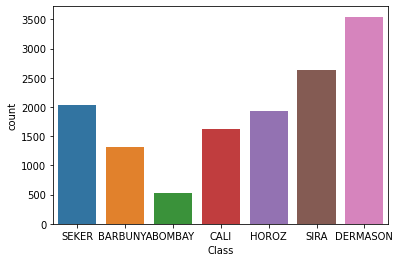

In [67]:
# The data set is not completely balanced, but there are probably enough samples of every class to still be accurate
print(bean_data.groupby('Class').size())

sns.countplot(bean_data['Class'],label="Count")
plt.show

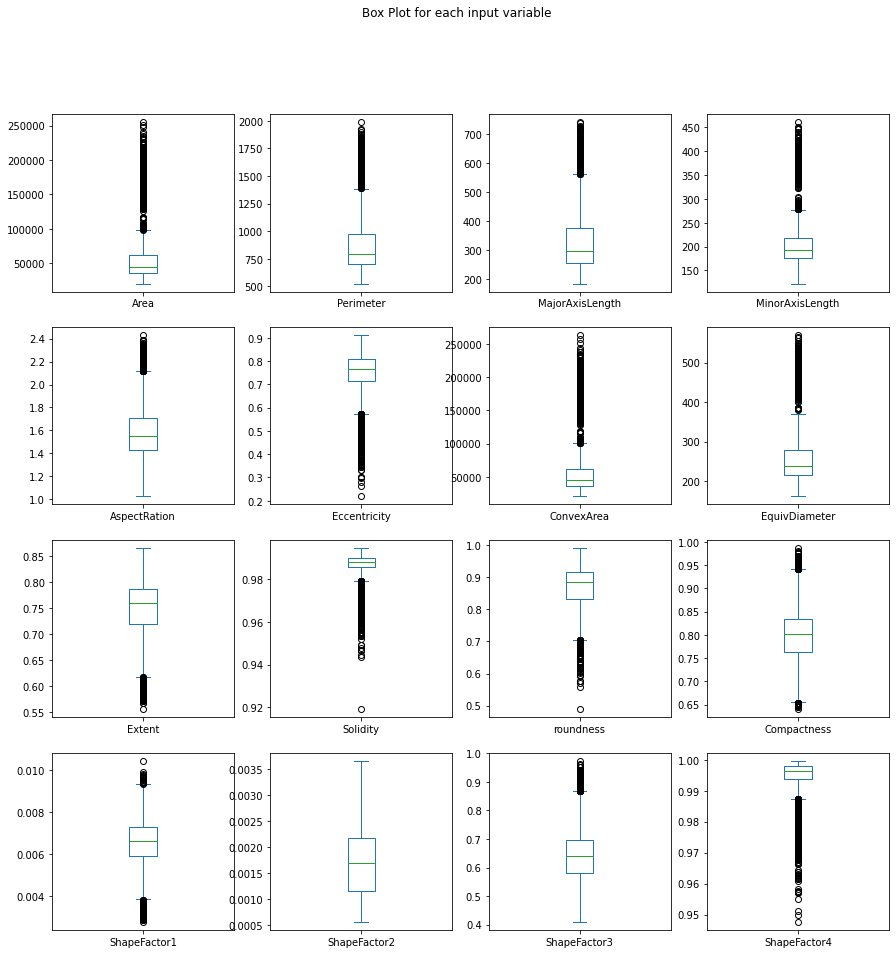

In [70]:
# A box plot for each variable will give us a clearer idea of the distribution of the input variables
bean_data.drop('Binary Class', axis=1).plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15,15), 
                                        title='Box Plot for each input variable')
plt.show()
# There are no noticable outliers that need to be removed before we can start learning

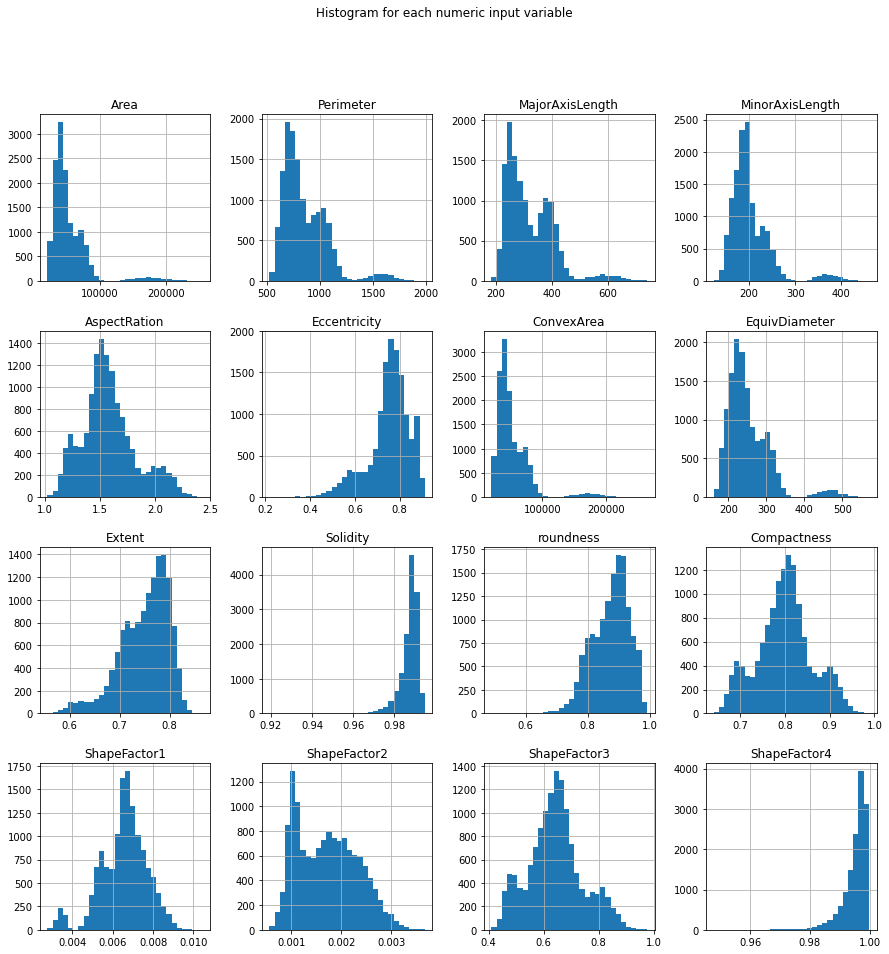

In [73]:
# we also want to learn more about the distribution for each input variables
bean_data.drop('Binary Class' ,axis=1).hist(bins=30, figsize=(15,15))
pl.suptitle("Histogram for each numeric input variable")
plt.show()

In [74]:
# The plots look like normal data to us, there might be some correlated features but that is not a problem.

# Baseline model

One really simple model that we could train as baseline model is a logistic regression model.
We will use one of sklearn's methods to split the data into train and test data

In [76]:
# Some imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

In [77]:
x = bean_data[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']]
y = bean_data['Binary Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# we apply scaling as pre-process step
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Sanity checks about length of train and test data
print("Nr of train samples:" + str(len(x_train)))
print("Nr of test samples:" + str(len(x_test)))

Nr of train samples:10208
Nr of test samples:3403


In [78]:
# Making the model
# All parameters not specified are set to their defaults
lr = LogisticRegression(max_iter=350)
lr.fit(x_train, y_train)

y_pred_test = lr.predict(x_test)

In [85]:
# Model evaluation with classification report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89       319
           1       1.00      0.98      0.99       111
           2       0.92      0.95      0.94       419
           3       0.92      0.93      0.92       905
           4       0.94      0.95      0.95       491
           5       0.94      0.94      0.94       470
           6       0.85      0.86      0.85       688

    accuracy                           0.92      3403
   macro avg       0.93      0.92      0.93      3403
weighted avg       0.92      0.92      0.92      3403



In [52]:
# Use score method to get accuracy of model
score = lr.score(x_test, y_test)
print(score)

0.9156626506024096


# Ensemble learning: Random Forest

The baseline model has an accuracy score of 88.4%. This is an okay score but there is room for improvement. Let's see if we can do better with ensemble learning.

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
# Making the model
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(x_train, y_train)
 
y_pred_test = clf.predict(x_test)

In [89]:
# Model evaluation with classification report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       319
           1       1.00      0.99      1.00       111
           2       0.94      0.94      0.94       419
           3       0.91      0.94      0.93       905
           4       0.95      0.95      0.95       491
           5       0.95      0.95      0.95       470
           6       0.88      0.86      0.87       688

    accuracy                           0.93      3403
   macro avg       0.94      0.94      0.94      3403
weighted avg       0.93      0.93      0.93      3403



In [90]:
# Use score method to get accuracy of model
score = clf.score(x_test, y_test)
print(score)

0.9265354099324126


# Adjusting the hyperparameters

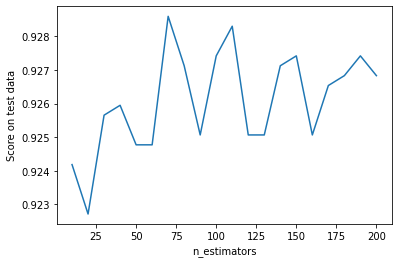

In [99]:
# Plotting the score per n_estimator in the range 10 - 200 with steps of 20
scores = []
n_estimators = list(range(10,210,10))
for i in range(10,210,10):
    clf = RandomForestClassifier(n_estimators = i) 
    clf.fit(x_train, y_train)
    score = clf.score(x_test, y_test)
    scores.append(score)

plt.plot(n_estimators, scores)
plt.ylabel("Score on test data")
plt.xlabel("n_estimators")
plt.show()


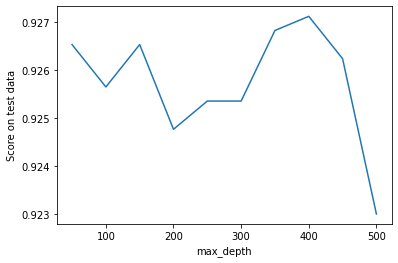

In [100]:
# Plotting the score per n_estimator in the range 10 - 200 with steps of 20
scores = []
n_estimators = list(range(50,550,50))
for i in range(50,550,50):
    clf = RandomForestClassifier(n_estimators = 80, max_depth = i) 
    clf.fit(x_train, y_train)
    score = clf.score(x_test, y_test)
    scores.append(score)

plt.plot(n_estimators, scores)
plt.ylabel("Score on test data")
plt.xlabel("max_depth")
plt.show()


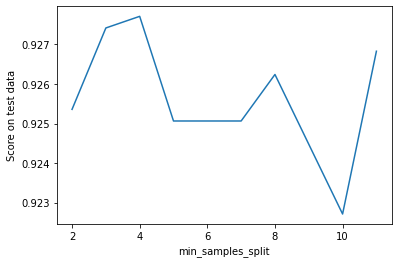

In [102]:
# Plotting the score per n_estimator in the range 10 - 200 with steps of 20
scores = []
n_estimators = list(range(2,12,1))
for i in range(2,12,1):
    clf = RandomForestClassifier(n_estimators = 80, max_depth = 400, min_samples_split = i) 
    clf.fit(x_train, y_train)
    score = clf.score(x_test, y_test)
    scores.append(score)

plt.plot(n_estimators, scores)
plt.ylabel("Score on test data")
plt.xlabel("min_samples_split")
plt.show()

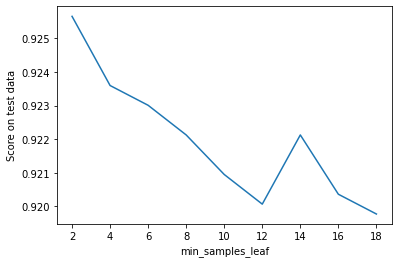

In [103]:
# Plotting the score per n_estimator in the range 10 - 200 with steps of 20
scores = []
n_estimators = list(range(2,20,2))
for i in range(2,20,2):
    clf = RandomForestClassifier(n_estimators = 80, max_depth = 400, min_samples_split = 4, min_samples_leaf= i) 
    clf.fit(x_train, y_train)
    score = clf.score(x_test, y_test)
    scores.append(score)

plt.plot(n_estimators, scores)
plt.ylabel("Score on test data")
plt.xlabel("min_samples_leaf")
plt.show()

In [112]:
# Verify this with a grid optimizer over multiple hyperparameters at the same time
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier()
param_vals = [{ 'n_estimators': [70, 80, 90],
               'max_depth': [375, 400, 425], 
               'min_samples_split': [3, 4],
               'min_samples_leaf': [2]}]
random_rf = GridSearchCV(estimator=model, param_grid=param_vals,
                              scoring='accuracy', cv=5,
                              refit=True, n_jobs=-1)

#Training and prediction

random_rf.fit(x_train, y_train)
preds = random_rf.best_estimator_.predict(x_test)

In [113]:
print(random_rf.best_estimator_.score(x_test, y_test))

0.9271231266529533


In [114]:
print(random_rf.best_params_)

{'max_depth': 375, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 80}


In [126]:
clf = RandomForestClassifier(n_estimators = 80, max_depth = 375, min_samples_split = 4, min_samples_leaf= 2) 
clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)
print(score)
y_pred_test = clf.predict(x_test)
print(classification_report(y_test, y_pred_test))

0.927710843373494
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       319
           1       1.00      1.00      1.00       111
           2       0.94      0.94      0.94       419
           3       0.91      0.94      0.92       905
           4       0.96      0.95      0.96       491
           5       0.95      0.96      0.95       470
           6       0.88      0.86      0.87       688

    accuracy                           0.93      3403
   macro avg       0.94      0.94      0.94      3403
weighted avg       0.93      0.93      0.93      3403

